Лабораторная работа № 4 по Нейроинформатике

Сети с радиальными базисными элементами

Выполнила: Тимофеева Наталья М8О-408Б-19

Вариант № 16

Часть 2

Аппроксимация

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from matplotlib import pyplot as plt
from keras import backend
from timeit import default_timer as timer

In [82]:
class RBFLayer(keras.layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(RBFLayer, self).__init__(**kwargs)
    def build(self, input_shape):
        self.mu = self.add_weight(name = 'mu',
                                  shape = (input_shape[1], self.output_dim),
                                  initializer = tf.keras.initializers.RandomUniform(minval = 0, maxval = 3.5),
                                  trainable = True)
        self.sigma = self.add_weight(name = 'sigma',
                                     shape = (self.output_dim,),
                                     initializer = 'random_normal',
                                     trainable = True)
        self.sw = self.add_weight(name = 'sw',
                                  shape = (self.output_dim,),
                                  initializer = 'random_normal',
                                  trainable = True)
        super(RBFLayer, self).build(input_shape)
    
    def call(self, inputs):
        diff = backend.expand_dims(inputs) - self.mu
        output = backend.exp(backend.sum(diff ** 2, axis = 1) * self.sigma)
        output = output * self.sw
        return output

In [83]:
def fun(t):
    return np.sin(np.sin(t) * t ** 2 + 3 * t - 10)

Создание модели

In [84]:
model = keras.models.Sequential()
model.add(RBFLayer(25, input_dim = 1))
model.add(layers.Dense(16, 
                       activation = "relu"))
model.add(layers.Dense(15, 
                       activation = "tanh"))
model.add(layers.Dense(1, 
                       activation = "tanh"))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [85]:
t1 = np.linspace(0, 3.5, 100)
y1 = fun(t1)

In [86]:
epochs = 2000
batch_size = 7

time_start = timer()
hist = model.fit(t1, y1, batch_size = batch_size, epochs = epochs)
time_end = timer()

Epoch 1/2000
15/15 [==============================] - 0s 997us/step - loss: 0.4985 - mae: 0.6302
Epoch 2/2000
15/15 [==============================] - 0s 855us/step - loss: 0.4860 - mae: 0.6236
Epoch 3/2000
15/15 [==============================] - 0s 855us/step - loss: 0.4836 - mae: 0.6244
Epoch 4/2000
15/15 [==============================] - 0s 855us/step - loss: 0.4836 - mae: 0.6240
Epoch 5/2000
15/15 [==============================] - 0s 855us/step - loss: 0.4827 - mae: 0.6235
Epoch 6/2000
15/15 [==============================] - 0s 926us/step - loss: 0.4811 - mae: 0.6226
Epoch 7/2000
15/15 [==============================] - 0s 855us/step - loss: 0.4798 - mae: 0.6205
Epoch 8/2000
15/15 [==============================] - 0s 784us/step - loss: 0.4829 - mae: 0.6240
Epoch 9/2000
15/15 [==============================] - 0s 926us/step - loss: 0.4744 - mae: 0.6181
Epoch 10/2000
15/15 [==============================] - 0s 926us/step - loss: 0.4761 - mae: 0.6185
Epoch 11/2000
15/15 [========

In [87]:
print('Эпох: {0}'.format(epochs))
print('Время обучения: {0} секунд'.format(int(time_end - time_start)))
print('Функция потерь MSE: {0}'.format(min(hist.history['loss'])))
print('Метрика качества MAE: {0}'.format(min(hist.history['mae'])))

Эпох: 2000
Время обучения: 43 секунд
Функция потерь MSE: 0.0013011953560635448
Метрика качества MAE: 0.02217509038746357


In [88]:
t2 = np.linspace(0, 3.5, 2000)
y2 = model.predict(t2)
real_y = fun(t2)

63/63 [==============================] - 0s 611us/step


In [89]:
mu_x = model.get_layer(index = 0).get_weights()[0][0]
mu_y = model.predict(mu_x)

1/1 [==============================] - 0s 16ms/step


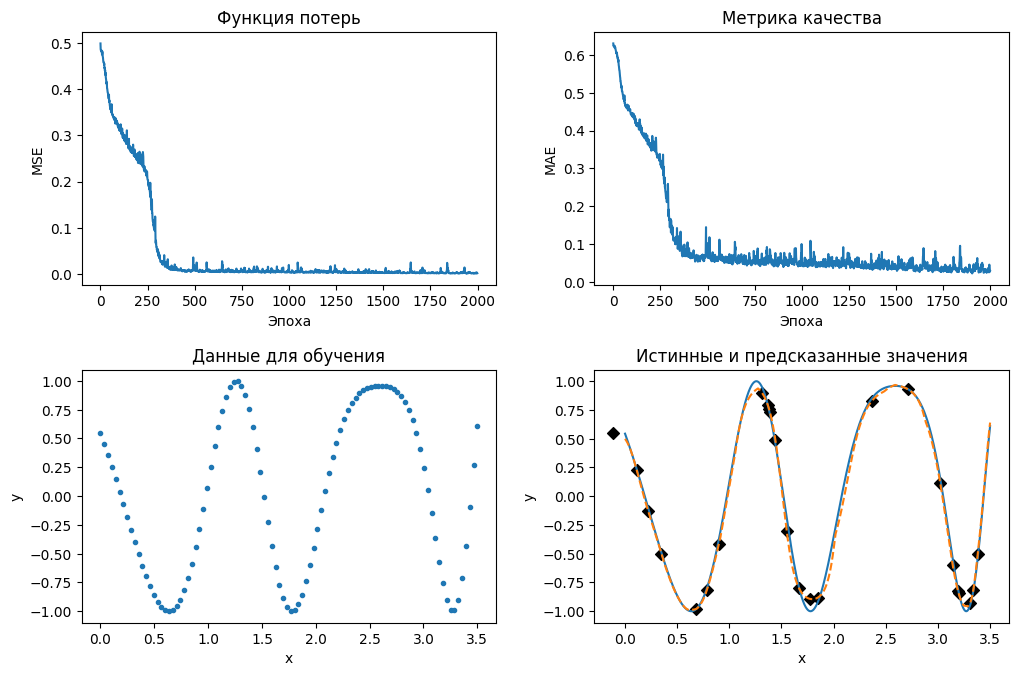

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6.5))
fig.tight_layout(h_pad = 4, w_pad = 4)

axes[0, 0].set_title('Функция потерь')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].plot(hist.history['loss'])

axes[0, 1].set_title('Метрика качества')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].plot(hist.history['mae'])

axes[1, 0].set_title('Данные для обучения')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].plot(t1, y1, '.')

axes[1, 1].set_title('Истинные и предсказанные значения')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].plot(t2, real_y)
axes[1, 1].plot(t2, y2, '--')
axes[1, 1].scatter(mu_x, mu_y, color = "black", marker = "D")